In [1]:
from time import time
from utils import make_batch
from models import WaveNet, Generator
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
%matplotlib inline

In [2]:
Audio('./voice_train.wav')

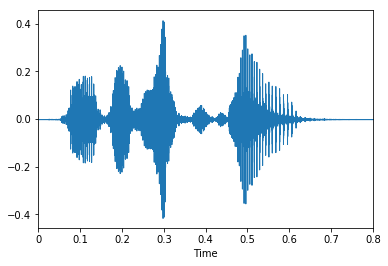

In [3]:
x, sr = librosa.load('./voice_train.wav')
librosa.display.waveplot(x, sr=sr)

In [4]:
inputs, targets = make_batch('./voice_train.wav')
# output_path = './output.wav'
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1
# sample_rate = 44100
sample_rate = 32000

In [5]:
inputs.shape

(1, 35315, 1)

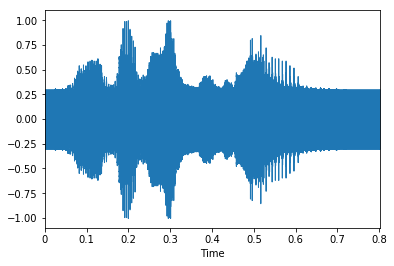

In [6]:
librosa.display.waveplot(inputs[0, :, 0], sr=44100)

In [7]:
model = WaveNet(num_time_samples=num_time_samples, num_channels=num_channels, gpu_fraction=gpu_fraction)

In [8]:
# model = WaveNet(num_time_samples=num_time_samples, num_channels=num_channels, gpu_fraction=gpu_fraction)

# print('inputs.shape = ', inputs.shape)
# Audio(inputs.reshape(inputs.shape[1]), rate=44100)
# print('inputs.shape = ', inputs.shape)
# print('targets.shape = ', targets.shape)

tic = time()
model.test(inputs, targets)
toc = time()
print('Training time = {} seconds'.format(toc-tic))

generator = Generator(model)

input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, sample_rate)


INFO:tensorflow:Restoring parameters from ./bongsang_model.ckpt
Loading saved model from ./bongsang_model.ckpt
Test loss=0.09387670457363129
Training time = 30.009108543395996 seconds
Sampling step #0, signal prediction = -0.3019607843137255
Sampling step #1000, signal prediction = -0.3019607843137255
Sampling step #2000, signal prediction = -0.3019607843137255
Sampling step #3000, signal prediction = -0.2941176470588236
Sampling step #4000, signal prediction = -0.4274509803921569
Sampling step #5000, signal prediction = -0.3176470588235294
Sampling step #6000, signal prediction = -0.15294117647058825
Sampling step #7000, signal prediction = -0.2784313725490196
Sampling step #8000, signal prediction = -0.28627450980392155
Sampling step #9000, signal prediction = -0.28627450980392155
Sampling step #10000, signal prediction = -0.30980392156862746
Sampling step #11000, signal prediction = -0.34901960784313724
Sampling step #12000, signal prediction = -0.5764705882352941
Sampling step #130

In [9]:
Audio(predictions, rate=44100)

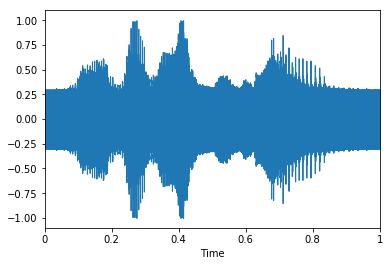

In [10]:
librosa.display.waveplot(predictions[0, :], sr=sample_rate)

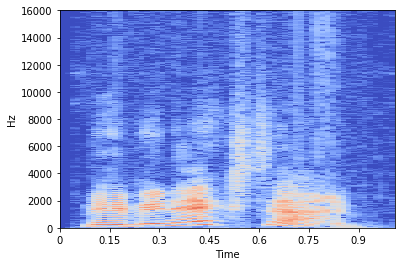

In [11]:
X = librosa.stft(predictions[0, :])
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')